# 입력변수(독립변수)의 정보를 활용하여 출력변수(종속변수)를 예측, + 0 을 하지 않고 reduced rank 
# ADJ. R-squared 가  R-squared 과 차이가 많이 나게 낮으면 overfitting 가능성이 있음
# & 회귀분석 중간 발표시 유의사항
## > 각 변수가 예측에 영향을 미치는것을
## - 연속형 변수의 경우 partial regression plot을 활용하여 보여줘야하고(정량적증명)
## - 이산형 변수의 경우 boxplot,  분산 분석(ANOVA: Analysis of Variance)활용하여 정량적인 확인을 시켜 줘야함
   - 이때, TSS=ESS+RSS 에서 ESS는 설명가능 해도, RSS 는 설명불가
   - 카테고리 값마다 Prob (F-statistic): 를 보고 유의미한지 를 증명해줘야함.
   - 이후 모델의 적합, 최적화를 지속한다.
   - 퍼포먼스는 높이되 복잡도는 낮게 유지할수 있을 수록 좋다
   - 카테고리값(범주형)과 다른 변수(실수형)interaction 사용하여 예측기울기를 변화시킨다.

<img src = 'interaction_plot.png' alt="Drawing"  style="width: 500px;"/>

# 꿀팁: 연봉같은 0 이상의 데이터에는 로그를 취하면 퍼포먼스가 올라가기도함
# *** cross validation 교차검증을 하면서 test 퍼포먼스를 높여햐한다. 
# 이때 파라미터의 수를 늘릴수록  트레이닝 모델의 퍼포먼스는 올라가겠지만 결국 테스트 퍼포먼스가 최대가 되도록 해야함

<img src = 'pofo_plot.png' alt="Drawing"  style="width: 500px;"/>

In [8]:

dataset = sm.datasets.get_rdataset("clouds", package= "HSAUR")
df = dataset.data
df.tail()

,seeding,time,sne,cloudcover,prewetness,echomotion,rainfall
19,yes,59,3.40,6.5,0.142,stationary,5.45
20,yes,65,3.15,3.1,0.073,moving,2.02
21,no,68,3.15,2.6,0.136,moving,0.82
22,yes,82,4.01,8.3,0.123,moving,1.09
23,no,83,4.65,7.4,0.168,moving,0.28


In [9]:
import statsmodels.api as sm

In [10]:
model = sm.OLS.from_formula("rainfall ~ scale(time) + scale(sne)  + seeding", data=df)
# ~scale(Carat)

In [11]:
result = model.fit()

In [18]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               rainfall   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     2.943
Date:                Sat, 23 May 2020   Prob (F-statistic):             0.0579
Time:                        09:18:35   Log-Likelihood:                -56.380
No. Observations:                  24   AIC:                             120.8
Df Residuals:                      20   BIC:                             125.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9966      0.809      4.

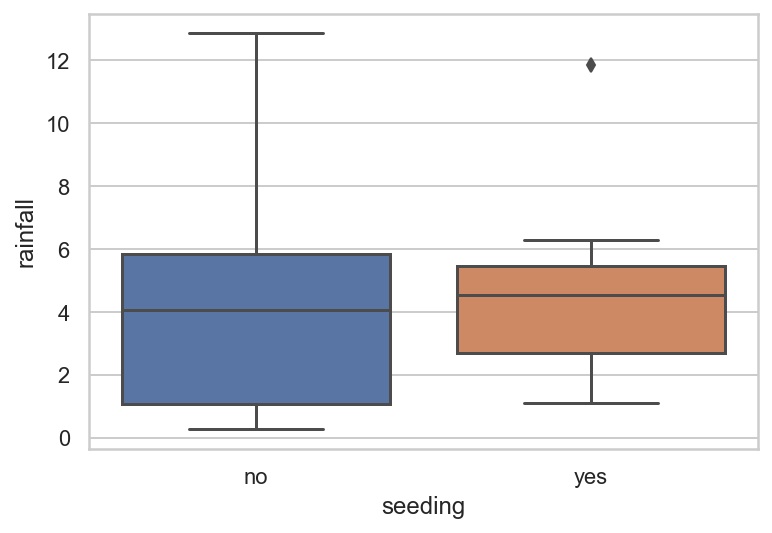

In [21]:
sns.boxplot(x="seeding", y = "rainfall", data = df)
plt.show()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [28]:
model = sm.OLS.from_formula("rainfall ~ seeding * (scale(time) + scale(sne) + scale(prewetness) + echomotion + scale(cloudcover)) ", data=df)
# ~scale(Carat)

In [29]:
result = model.fit()

In [30]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               rainfall   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     3.095
Date:                Sat, 23 May 2020   Prob (F-statistic):             0.0321
Time:                        09:37:33   Log-Likelihood:                -44.630
No. Observations:                  24   AIC:                             113.3
Df Residuals:                      12   BIC:                             127.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [38]:
model = sm.OLS.from_formula("rainfall ~seeding + seeding : scale(sne)  ", data=df)
# ~scale(Carat)

In [39]:
result = model.fit()

In [40]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               rainfall   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1.843
Date:                Sat, 23 May 2020   Prob (F-statistic):              0.172
Time:                        09:44:50   Log-Likelihood:                -57.839
No. Observations:                  24   AIC:                             123.7
Df Residuals:                      20   BIC:                             128.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# 경력과 연봉관계 예측 연습

In [13]:
dataset = sm.datasets.get_rdataset("Salaries", package="carData")
df = dataset.data[["yrs.since.phd", "salary"]] # . 이나 공간은  없애야함
df = df.rename(columns={"yrs.since.phd": "experience"})
df.tail()

,experience,salary
392,33,103106
393,31,150564
394,42,101738
395,25,95329
396,8,81035


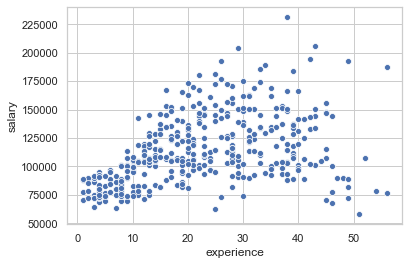

In [34]:
sns.scatterplot(df.experience, df.salary)

plt.show()
%matplotlib inline



In [35]:
model = sm.OLS.from_formula("salary ~ experience ", data=df)

In [36]:
result = model.fit()

In [37]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     84.23
Date:                Sat, 23 May 2020   Prob (F-statistic):           2.50e-18
Time:                        19:56:19   Log-Likelihood:                -4620.9
No. Observations:                 397   AIC:                             9246.
Df Residuals:                     395   BIC:                             9254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.172e+04   2765.792     33.162      0.0

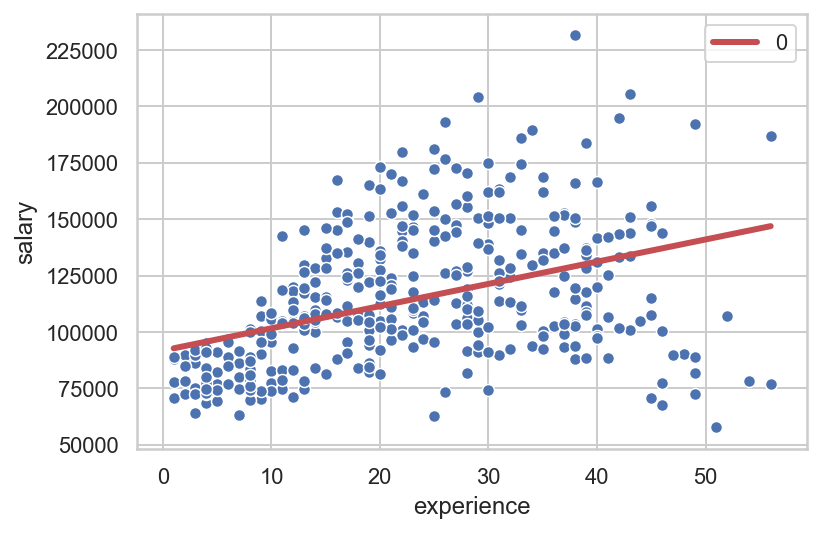

In [53]:

y_hat = result.predict(df)
df1 = pd.concat([y_hat, df.experience], axis = 1).sort_values("experience")
df1.plot(x="experience", style = "r-", lw=3)
sns.scatterplot(x='experience', y='salary', data=df)
# plot(x='expFed erience', y='result')
plt.show()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



# 2차 다항회귀

In [54]:
model = sm.OLS.from_formula("salary ~ scale(experience) +  I(experience**2) ", data=df)

In [55]:
result = model.fit()

In [56]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     88.95
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.32e-32
Time:                        20:19:32   Log-Likelihood:                -4585.3
No. Observations:                 397   AIC:                             9177.
Df Residuals:                     394   BIC:                             9189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            1.56e+05   4971

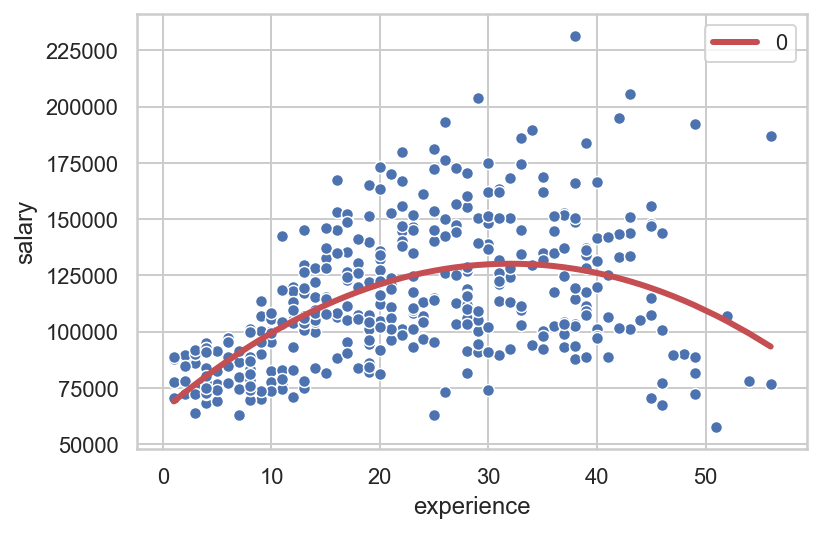

In [57]:

y_hat = result.predict(df)
df1 = pd.concat([y_hat, df.experience], axis = 1).sort_values("experience")
df1.plot(x="experience", style = "r-", lw=3)
sns.scatterplot(x='experience', y='salary', data=df)
# plot(x='expFed erience', y='result')
plt.show()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [58]:
model = sm.OLS.from_formula("np.log(salary) ~ scale(experience) +  I(experience**2) ", data=df)

In [59]:
result = model.fit()

In [60]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.87e-38
Time:                        20:21:15   Log-Likelihood:                 59.232
No. Observations:                 397   AIC:                            -112.5
Df Residuals:                     394   BIC:                            -100.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.0211      0

# 샐러리값에 로그를 취해주고 다시 예측치의 플롯을 그려주는 방법을 모름

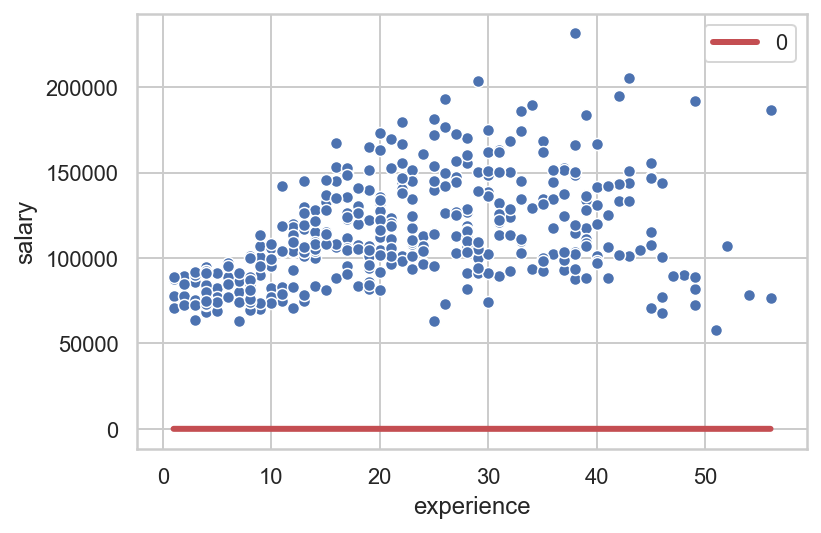

In [65]:
y_hat = result.predict(df)
df1 = pd.concat([y_hat, df.experience], axis = 1).sort_values("experience")
df1.plot(x="experience", style = "r-", lw=3)
sns.scatterplot(x='experience', y='salary', data=df)
# plot(x='expFed erience', y='result')
plt.show()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 차량 연비 예측 모델 연습

In [66]:
mtcars = sm.datasets.get_rdataset("mtcars")
df = mtcars.data
df.tail()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [67]:
# 예측하려는 값에 영향을 줄만한 변수들의 내용을 잘 파악하는 것 이 중요!
##### 차량의 연비이므로 차량의 무게, 변속기의 종류등 > 역시 도메인지식이 중요하다 차에 더 잘 알고 있다면 더 잘 예측할 수 있다!

print(mtcars.__doc__)

+--------+-----------------+
| mtcars | R Documentation |
+--------+-----------------+

Motor Trend Car Road Tests
--------------------------

Description
~~~~~~~~~~~

The data was extracted from the 1974 *Motor Trend* US magazine, and
comprises fuel consumption and 10 aspects of automobile design and
performance for 32 automobiles (1973–74 models).

Usage
~~~~~

::

   mtcars

Format
~~~~~~

A data frame with 32 observations on 11 (numeric) variables.

+-------+------+------------------------------------------+
| [, 1] | mpg  | Miles/(US) gallon                        |
+-------+------+------------------------------------------+
| [, 2] | cyl  | Number of cylinders                      |
+-------+------+------------------------------------------+
| [, 3] | disp | Displacement (cu.in.)                    |
+-------+------+------------------------------------------+
| [, 4] | hp   | Gross horsepower                         |
+-------+------+------------------------------------------+
| 

In [99]:
model = sm.OLS.from_formula("mpg ~ scale(cyl) + scale(disp) +	scale(hp)	+ scale(drat)+scale(wt)+	scale(qsec)	+vs	+am	+scale(gear)+	scale(carb) ", data=df)

In [100]:
result = model.fit()

In [101]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sat, 23 May 2020   Prob (F-statistic):           3.79e-07
Time:                        10:27:11   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      18.9278      1.445     13.099      

In [177]:
model = sm.OLS.from_formula("mpg ~ scale(cyl) + scale(I(disp**2)) +	scale(hp)	+ am * (scale(drat**2)) +scale(wt)+	scale(qsec)	+vs	+ am	+scale(I(gear**2))+	scale(carb) ", data=df)

In [178]:
result = model.fit()

In [179]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     13.10
Date:                Sat, 23 May 2020   Prob (F-statistic):           7.51e-07
Time:                        10:48:53   Log-Likelihood:                -68.699
No. Observations:                  32   AIC:                             161.4
Df Residuals:                      20   BIC:                             179.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              19.1154    

In [68]:
model = sm.OLS.from_formula("mpg ~ C(am) * (scale(cyl) + scale(I(disp**2)) +	scale(hp)	+ scale(I(drat**2))+scale(wt)+	scale(qsec)	+ C(vs)	+scale(I(gear**2))+	C(carb)) ", data=df)

In [69]:
result = model.fit()

In [70]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     35.20
Date:                Sat, 23 May 2020   Prob (F-statistic):           9.89e-06
Time:                        20:47:52   Log-Likelihood:                -28.345
No. Observations:                  32   AIC:                             104.7
Df Residuals:                       8   BIC:                             139.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [71]:
model = sm.OLS.from_formula("mpg ~ scale(cyl) + scale(I(disp**2)) +	scale(hp)	+ scale(I(drat**2))+scale(wt)+	scale(qsec)	+scale(gear)+	vs * (scale(carb))", data=df)

In [72]:
result = model.fit()

In [73]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     15.17
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.81e-07
Time:                        20:47:57   Log-Likelihood:                -68.669
No. Observations:                  32   AIC:                             159.3
Df Residuals:                      21   BIC:                             175.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              19.6033    

# 변수의 갯수를 줄이고 의미있는 피처만 골라서 나머지는 버리고 최종화함 다만 트레이닝 퍼포먼스일뿐
# P>|t|도 안정적이 되는 결과

In [74]:
model4 = sm.OLS.from_formula("mpg ~ " + "scale(wt) + C(am) : (scale(wt)	+ scale(qsec)) ", data=df)

In [75]:
result = model4.fit()

In [76]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     57.37
Date:                Sat, 23 May 2020   Prob (F-statistic):           8.28e-13
Time:                        20:48:04   Log-Likelihood:                -66.359
No. Observations:                  32   AIC:                             142.7
Df Residuals:                      27   BIC:                             150.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               18.6713 

# 1. 스케일링
# 2. 카테고리 처리
# 3. 다항처리
# 4. 카테고리변수와 연속형 변수간의 인터렉션처리
# 5. 로그처리 
# 6. 불필요 미처 정리 및 단순화(퍼포먼스를 해치지 않는 선에서)

# 여기서 부터는 텍스트/사운드 분석인데 여기 부터는 다운받은 노트북을 참고하고 수업진도후 다시 확실히 파악

In [77]:
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

File ‘ratings_train.txt’ already there; not retrieving.



In [78]:
import codecs
with codecs.open("ratings_train.txt", encoding='utf-8')as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]
docs = list(zip(*data))[1]
docs

('아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

In [251]:
from konlpy.tag import Okt

In [252]:
tagger = Okt()

def tokenize(doc):
    tokens = [ t for t in tagger.morphs(doc)]
    return tokens

In [254]:
tokenize(docs[0])

['아', '더빙', '..', '진짜', '짜증나네요', '목소리']

In [257]:
%%time
sentenes = [tokenize(d) for d in docs[:500]]

CPU times: user 997 ms, sys: 5.6 ms, total: 1 s
Wall time: 871 ms


In [258]:
words = [word for sentence in sentences for word in sentence]

NameError: name 'sentences' is not defined

In [260]:
from nltk import FreqDist
fd = FreqDist(words)

NameError: name 'words' is not defined

In [261]:
fd.dmost_commen(10)

NameError: name 'fd' is not defined

In [1]:
from wordcloud import WordCloud
font_path = 
wc = WordCloud(Width=1000, height=600 )

SyntaxError: invalid syntax (<ipython-input-1-6c2c573fae14>, line 2)

In [2]:
import cv2

ModuleNotFoundError: No module named 'cv2'